# Procesamiento de Imágenes utilizando Numpy

Las matrices de numpy son el paquete fundamental para la computación científica con Python y proporcionan el bloque de construcción básico de la mayoría de los análisis de datos en Python. Gran parte de las librerías de Machine Learning se basan en cálculos realizados con esta librería, que sin duda es una de las más potentes en el mundo de la programación


El procesamiento de imágenes y señales son dos de las áreas en las que Numpy se utiliza con frecuencia.

Si te interesa este tema, hay una serie de potentes librerías para el procesamiento de imágenes en python, por ejemplo OpenCV, SciKit-Image y Pillow. Si quieres ampliar tus conocimientos del lenguaje Python aún más (o quieres aplicarlos a empresas de procesamiento de datos con orientación científica) te recomiendo que mires los módulos mencionados.


In [1]:
import numpy as np
import matplotlib.pylab as plt
from urllib.request import urlopen # para abrir archivos en línea

%matplotlib inline

Para este ejercicio vamos a trabajar con una imagen del incónico James Bond. Vamos a jugar con la configuración de la imagen utilizando Python. Vamos a crear nuestro propio set de filtros (como los de Instagram) para aplicarlos en el superagente 007- 
Nuestra primera misión es cargar la imagen de James Bond desde Github, utilizando urlopen




In [5]:
ruta_imagen = urlopen("https://github.com/patofw/imf_master/blob/master/otros_recursos_imagenes/bond.jpg?raw=true")
im = plt.imread(ruta_imagen, "jpg") # lo cargamos en matplotlib 

im.shape # vemos la forma del archivo cargo

(447, 444, 3)

Como puedes ver el método imread devuelve una matriz Numpy

En este caso vemos que la imagen está cargada en una matriz de dimensión 447 x 444 x 3.

Los dos primeros índices representan la posición Y y X de un píxel, y el tercero representa el valor de color RGB (Red, Green, Blue) del píxel.

Usando el método imshow podemos trazar la imagen para visualizarla

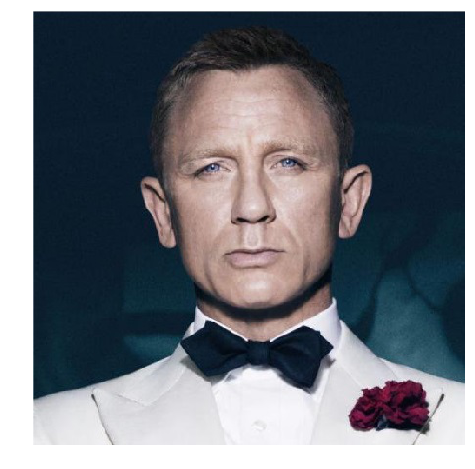

In [3]:
def plti(im, h=8, **kwargs):
    """
    Funcion para visualizar la imagen
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')
    plt.show()
# la ejecutamos
plti(im)

He ahí el famoso agente 007. Pero si yo fuera su enemigo me gustaría mirarlo de más cerca, ver si puedo encontrar sus debilidades. Hagamos un acercamiento a una sección de su rostro. Esto equivale a la opción "crop" en las aplicaciones de tratamiento de imágenes. Sí, una línea de código 


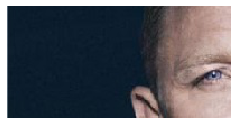

In [78]:
# limitamos la matriz a una sección de la imagen
new_im = im[100:200,:200,:]    
plti(new_im)

# Colores

Cada píxel de la imagen está representado por tres números enteros: el valor RGB de su color. Dividir la imagen en componentes de color separados es sólo cuestión de sacar el trozo correcto del conjunto de la imagen:

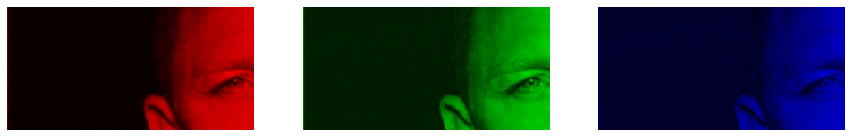

In [79]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(new_im.shape,dtype="uint8")
    tmp_im[:,:,c] = new_im[:,:,c]
    ax.imshow(tmp_im)
    ax.set_axis_off()
plt.show()

Cuando usamos [imshow](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.imshow) de Matplotlibpara mostrar las imágenes, es importante llevar la cuenta del tipo de datos que se está usando, ya que el mapeo de color utilizado depende del tipo de datos: si se usa un tipo *float*, los valores se mapean en el rango 0-1, por lo que necesitamos lanzar al tipo "uint8" para obtener el comportamiento esperado. Una buena discusión de este tema se puede encontrar aquí [link](http://stackoverflow.com/questions/24739769/matplotlib-imshow-plots-different-if-using-colormap-or-rgb-array).




# 50 sombras de Bond (Escalas grises)

En el tema del color, también podemos transformar la imagen en escala de grises fácilmente. Hay varias maneras de hacerlo, pero una forma sencilla es tomar la media ponderada del valor RGB de la imagen original:

In [6]:
def to_grayscale(im, weights = np.c_[0.2980, 0.5879, 0.1140]):
    """
    Transforma una imagen de color a una escala de grises 
    tomando la media de sus valores RGB ponderados. 
    Args: 
    im : La imagen en formato numpy array
    weights: Pesos, debe venir en formato vector de numpy. 
      Por ejemplo numpy.c_
    return: Una matriz de numpy que puede visualizarse con la funcion plti
    """
    # tile repite el primer argumento de la matriz.  
    # el segundo argumento es el número de veces a repetir
    tile = np.tile(weights, reps=(im.shape[0],im.shape[1],1))
    return np.sum(tile * im, axis=2)

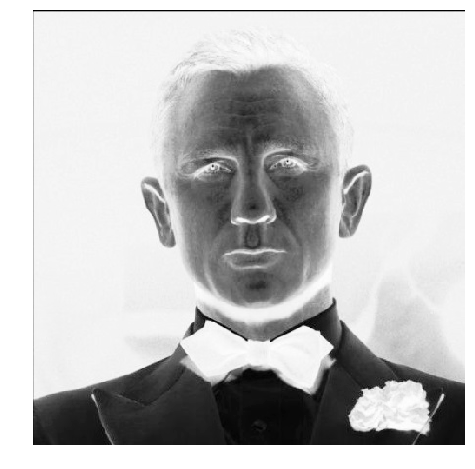

In [7]:
img_grey = to_grayscale(im)

plti(img_grey, cmap='Greys')

# Convoluciones 

El concepto de [convoluciones](https://es.wikipedia.org/wiki/Convoluci%C3%B3n) es uno de los más importantes en el desarrollo de algoritmos de reconocimiento de imágenes (Image recognition) en sistemas de inteligencia artificial. En este curso no nos adentraremos profundamente en este tema, ya que lo veran con mayor detalle en los siguientes módulos del máster. 

Sin embargo, por ahora entenderemos a las convuluciones como operaciones/transformaciones que se pueden aplicar a una matriz (o una imagen como hemos visto ahora que las imágenes son matrices de colores RGB). La convolución se define como: 

$C(x,y) = \int dx'dy' I(x + x',y + y') W(x',y')$

Donde $C$ es la imagen enrevesada, $I$ es la imagen original y $W$ es una función de ventana. Esencialmente estamos reemplazando cada píxel con una suma ponderada de los píxeles cercanos. 

Las convoluciones pueden ser operaciones costosas, por lo que empezaremos con una reducción del espacio matricial, es decir aplicaremos un filtro en la imagen

In [8]:
from scipy.ndimage.interpolation import zoom
im_small = zoom(im, (0.2,0.2,1))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


Ahora podemos aplicar una ventana uniforme a la imagen. Esto tiene el efecto de desdibujar la imagen, promediando cada píxel con sus píxeles cercanos

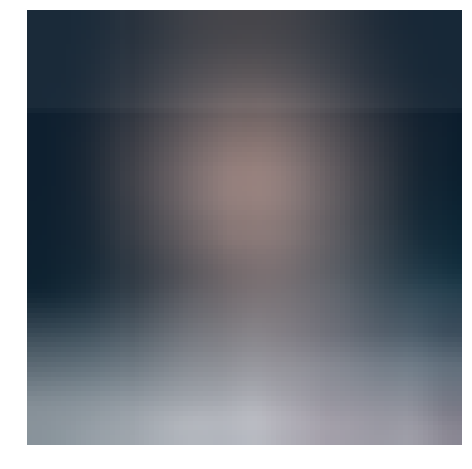

In [9]:
from scipy.signal import convolve2d #importamos el método de scipy

def convolve_all_colours(im, window):
    """
    Convoluciona im con una ventana sobre los tres canales de color
    Args: 
    im: La imagen en formato numpy array
    window: Ventana a aplicar 
    """
    ims = [] # array vacion que poblaremos luego
    for d in range(3):
        # Realizamos la convolucion
        im_conv_d = convolve2d(im[:,:,d],
                               window, mode="same", boundary="symm")
        ims.append(im_conv_d)

    im_conv = np.stack(ims, axis=2).astype("uint8")
    
    return im_conv

n= 40 # que pasa si cambiamos el valor de n
window = np.ones((n,n))
window /= np.sum(window)
plti(convolve_all_colours(im_small, window))

## Challenge 

Bueno, se nos ha ido la mano con ese filtro. Mr.Bond es ahora solo un elemento nublado. Qué pasa si cambias el valor de n?


Hasta ahora hemos considerado aplicar las mismas operaciones a todos los canales de color a la vez. Si desdibujamos sólo un canal de color a la vez, obtenemos los siguientes efectos novedosos. 

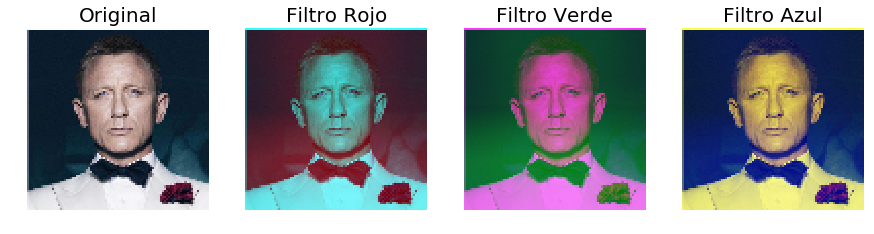

In [10]:
# creamos una figura vacia para popularla luego
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,5))

# ploteamos la imagen original
ax= axs[0]
ax.imshow(im_small)
ax.set_title("Original", fontsize=20)
ax.set_axis_off()
# Establecemos una ventana
w=75 # que pasa si cambias este valor
window = np.ones((w,w))
window /= np.sum(window)
# Graficamos cada filtro (RGB) en la figura
ax= axs[1]
ims = []
# Empezamos por el filtro Rojo
for d in range(3):
    if d == 0: # si d == 0, recuerda que 0 representa al rojo en (RGB)
        # aplicamos la convolucion
        im_conv_d = convolve2d(im_small[:,:,d],window,
                               mode="same", boundary="symm")
    else:
        im_conv_d = im_small[:,:,d]
    ims.append(im_conv_d)
ax.imshow(np.stack(ims, axis=2).astype("uint8"))
ax.set_title("Filtro Rojo", fontsize=20) 
ax.set_axis_off()
# Filtro Azul
ax= axs[2]
ims = []
for d in range(3):
    if d == 1: # si d == 1, recuerda que 1 representa al verde en (RGB)
        im_conv_d = convolve2d(im_small[:,:,d], 
                               window, mode="same", boundary="symm")
    else:
        im_conv_d = im_small[:,:,d]
    ims.append(im_conv_d)
ax.imshow(np.stack(ims, axis=2).astype("uint8"))
ax.set_title("Filtro Verde", fontsize=20)
ax.set_axis_off()

ax= axs[3]
ims = []
for d in range(3):
    if d == 2: # si d == 2, recuerda que 2 representa al azul en (RGB)
        im_conv_d = convolve2d(im_small[:,:,d], window, mode="same", boundary="symm")
    else:
        im_conv_d = im_small[:,:,d]
    ims.append(im_conv_d)
ax.imshow(np.stack(ims, axis=2).astype("uint8"))
ax.set_title("Filtro Azul", fontsize=20)
ax.set_axis_off()

# Segmentación

Otra área importante del procesamiento de imágenes es la segmentación de la imagen en diferentes regiones, por ejemplo, en primer plano y en segundo plano. Hay varias maneras de hacer esto, pero solo cubriremos pocas aquí. 

La más simple es convertir la imagen a escala de grises, y encontrar un umbral. Los píxeles con un valor por encima del umbral se tratan como pertenecientes a una región, y por debajo de otra región. Podemos explorar lo diferente que es elegir diferentes segmentos de umbrales nuestra imagen en escala de grises debajo

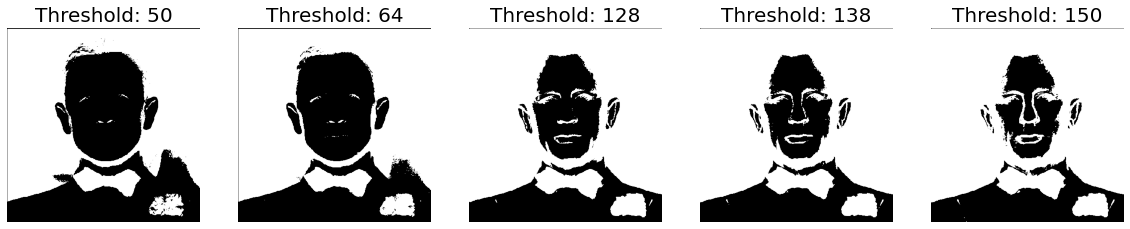

In [90]:
def simple_threshold(im, threshold=128):
    """Realiza una segmentacion simple"""
    return ((im > threshold) * 255).astype("uint8")

thresholds = [50,64,128,138,150] # Lista de limites...

# Creamos la figura vacia para popularla luego
fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
gray_im = to_grayscale(im) # lo pasamos a grises con la funcion que definimos antes

# Realizamos las transformaciones                       
for t, ax in zip(thresholds, axs):
    ax.imshow(simple_threshold(gray_im, t), cmap='Greys');
    ax.set_title(f"Threshold: {t}", fontsize=20);
    ax.set_axis_off();

La forma exacta en que escojamos un umbral será específica de la aplicación. Sin embargo, podríamos argumentar que esperaríamos que los valores de los píxeles de fondo fueran similares en valor a los otros valores de los píxeles de fondo, y lo mismo para el primer plano. 

## Segmentación por clusters

En el ejemplo anterior vimos una segmentación aplicada a una escala de grises. Podemos tener un enfoque similar para cada escala de color. Para ello podemos buscar por *clusters* o segmentos en el espacio de colores. 
En el siguiente ejemplo usaremos uno de los algoritmos más utilizados para segmentación, el [K-means](https://en.wikipedia.org/wiki/K-means_clustering) Aplicándolo directamente en la imagen nos resulta:

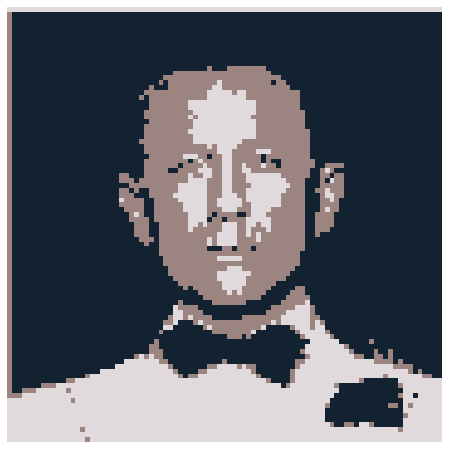

In [93]:
from sklearn.cluster import KMeans

h,w = im_small.shape[:2]
im_small_long = im_small.reshape((h * w, 3))
im_small_wide = im_small_long.reshape((h,w,3))

km = KMeans(n_clusters=3)

km.fit(im_small_long)

cc = km.cluster_centers_.astype(np.uint8)
out = np.asarray([cc[i] for i in km.labels_]).reshape((h,w,3))

plti(out)

No es una mala representación del señor Bond. Si asignamos aleatoriamente colores al final de cada segmento podemos crear un arte muy *Pop*! 

**Nota:** Ejecuta la siguiente celda varias veces. Qué sucede?

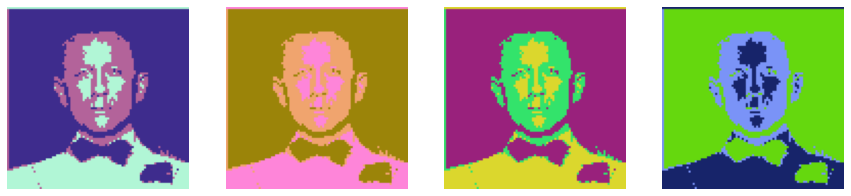

In [104]:
rng = range(4)

fig, axs = plt.subplots(nrows=1, ncols=len(rng), figsize=(15,5))
gray_im = to_grayscale(im)
                        
for t, ax in zip(rng, axs):
    rnd_cc = np.random.randint(0,256, size = (3,3))
    out = np.asarray([rnd_cc[i] for i in km.labels_]).reshape((h,w,3))
    ax.imshow(out)
    ax.set_axis_off()

# Siguientes pasos. 

Este tutorial nos muestra como utilizar funciones de Numpy para manipular y transformar una imagen. Esto es básicamente lo que hacen varias de las aplicaciones como Instagram o Facebook para darle un toque especial a las imágenes de los usuarios. 

Si quieres aprender más puedes revisar la librería [OpenCV](https://pypi.org/project/opencv-python/), que tiene varios ejemplos y tutoriales para profundizar más en este tema
